In [6]:
#######################################################################################
## Polynomial regression is progress. remaining work: applying the degree parameter to the model.#
##                                                                                    #
## Work by Devendra Kumar for Lytte AI Inc.                                           #
#######################################################################################

# begining of imports                                               ###
                                                                    ###
import numpy as np                                                  ###
import matplotlib.pyplot as plt                                     ###
                                                                    ###
# End of imports                                                    ###

%matplotlib inline


In [3]:
###########################################################################
# Testing on some non-linear data set having only one independent variable.
###########################################################################
#format of data set:
##          array([   [record1],
  #                   [record2],
  #                   [record3],
  #                   [.......]  ])
##
###########################################################################

# Demo Data set x
x= np.array([[1,2],[4,18],[3,9],[10,90],[7,15],[8,18],[13,30],[1,3],[4,16],[1,3],[4,18.5],[5,10],[6,13],[1.8,6],[10,99],[9,79],[8.6,65],[13,150],[1,6],[4,11]])


In [4]:
x

array([[  1. ,   2. ],
       [  4. ,  18. ],
       [  3. ,   9. ],
       [ 10. ,  90. ],
       [  7. ,  15. ],
       [  8. ,  18. ],
       [ 13. ,  30. ],
       [  1. ,   3. ],
       [  4. ,  16. ],
       [  1. ,   3. ],
       [  4. ,  18.5],
       [  5. ,  10. ],
       [  6. ,  13. ],
       [  1.8,   6. ],
       [ 10. ,  99. ],
       [  9. ,  79. ],
       [  8.6,  65. ],
       [ 13. , 150. ],
       [  1. ,   6. ],
       [  4. ,  11. ]])

In [5]:
input= np.array([[x]  for x in np.array(x[:,0])])
print(np.array(input))
output= np.array([[x]  for x in np.array(x[:,1])])

[[ 1. ]
 [ 4. ]
 [ 3. ]
 [10. ]
 [ 7. ]
 [ 8. ]
 [13. ]
 [ 1. ]
 [ 4. ]
 [ 1. ]
 [ 4. ]
 [ 5. ]
 [ 6. ]
 [ 1.8]
 [10. ]
 [ 9. ]
 [ 8.6]
 [13. ]
 [ 1. ]
 [ 4. ]]


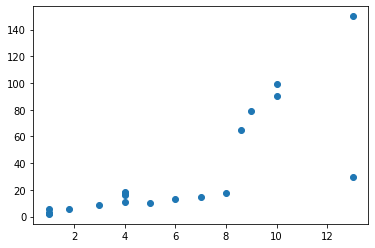

In [7]:
plt.scatter(input,output)

In [24]:
class regression:
    
    
    def __init__(self, iteration=10, learning_rate=0.01, degree=1, print_msg = False):
        
        self.iterat=iteration
        self.lr=learning_rate
        self.degree=degree
        self.weights=None
        self.bias=None
        self.print_msg=print_msg

        
#################################################################
  ##  Working on the polynomial regression
#################################################################
    '''
    def factorial(self,n):
        if n<=1:
          return 1
        else:
          return n*self.factorial(n-1)

    def combination(self,n,r):
        return self.factorial(n)/(self.factorial(r)*self.factorial(n-r) )   
    '''
##################################################################
  
    def fit(self, input_X, output_Y):
        nrecords, nfeatures = input_X.shape
        
        #num_non_linear_features= self.combination(self.degree+nfeatures-1,nfeatures-1)  #m-1+nCm-1

        if self.print_msg:
            print("records= ", nrecords, "  features= ", nfeatures)
        self.weights= np.zeros(nfeatures)

        self.bias=0.0
        
        if self.print_msg:
            fig= plt.figure()
            f= fig.add_subplot(111)
            f.scatter(input,output)

        for it in range(self.iterat):
            model= np.dot(input_X, self.weights) + self.bias
            loss= (1/nrecords)* np.sum((model- output_Y)**2)
            self.weights= self.weights-(1/nrecords)*self.lr*2*np.dot(np.transpose(input_X),(model-output_Y))
            self.bias-= (1/nrecords)*self.lr*2*np.sum(model-output_Y) 
            
            if self.print_msg:
                print("-------> iteration number: ",it,"  Loss: ",loss)
                print("-------> weights: ",self.weights)

            y=self.predict(input)
            
            if self.print_msg:
                if it%40==0 or it== self.iterat-1:
                    f.plot(input,y,color="red", alpha=self.iterat/(it+1))

    def predict(self, input_X):
        return (np.dot(input_X ,self.weights) + self.bias)[:,0]

In [28]:
model= regression(iteration=100)
model.fit(np.array(input),np.array(output))

In [29]:

y=model.predict(input)

(20,) (20, 1)


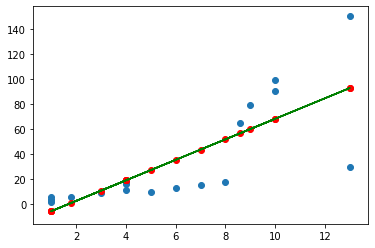

In [30]:
plt.scatter(input,output)
print(y.shape, input.shape) 
plt.scatter(input,y,color="red")
plt.plot(input,y,color="green")

In [16]:

model.predict([[2],[3],[4],[6],[7]])

array([ 2.60003716, 10.79232229, 18.98460743, 35.3691777 , 43.56146283])